<a href="https://colab.research.google.com/github/YasmineJiang/Recommendation_System/blob/main/Average_Weighted_Recommendation_Engines_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Building a movie recommendation system**

In [1]:
import pandas as pd
import numpy as np

In [2]:
credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
credits_rename = credits.rename(index=str,columns={'movie_id':'id'})
df = movies.merge(credits_rename,on='id')
df_clean = df.drop(columns=['homepage','title_x','title_y','status','production_countries'])

In [6]:
V = df_clean['vote_count'] #number of votes of the ratings
R = df_clean['vote_average'] #average of the moving as a rating from 0 -10
C = df_clean['vote_average'].mean() #the mean vote of the whole report
m = df_clean['vote_count'].quantile(0.7) #minimum vote in the top 250(currently 3000)

In [7]:
df_clean['weighted_average'] = (R*V + C*m)/(V + m)

In [8]:
movies_sorted_ranking = df_clean.sort_values('weighted_average',ascending= False)
movies_sorted_ranking[['original_title','vote_count','vote_average','weighted_average','popularity']].head(20)

,original_title,vote_count,vote_average,weighted_average,popularity
1881,The Shawshank Redemption,8205,8.5,8.340775,136.747729
3337,The Godfather,5893,8.4,8.192887,143.659698
662,Fight Club,9413,8.3,8.171648,146.757391
3232,Pulp Fiction,8428,8.3,8.157615,121.463076
65,The Dark Knight,12002,8.2,8.102674,187.322927
809,Forrest Gump,7927,8.2,8.056059,138.133331
1818,Schindler's List,4329,8.3,8.038748,104.469351
3865,Whiplash,4254,8.3,8.034695,192.528841
96,Inception,13752,8.1,8.018611,167.583710
1990,The Empire Strikes Back,5879,8.2,8.010426,78.517830


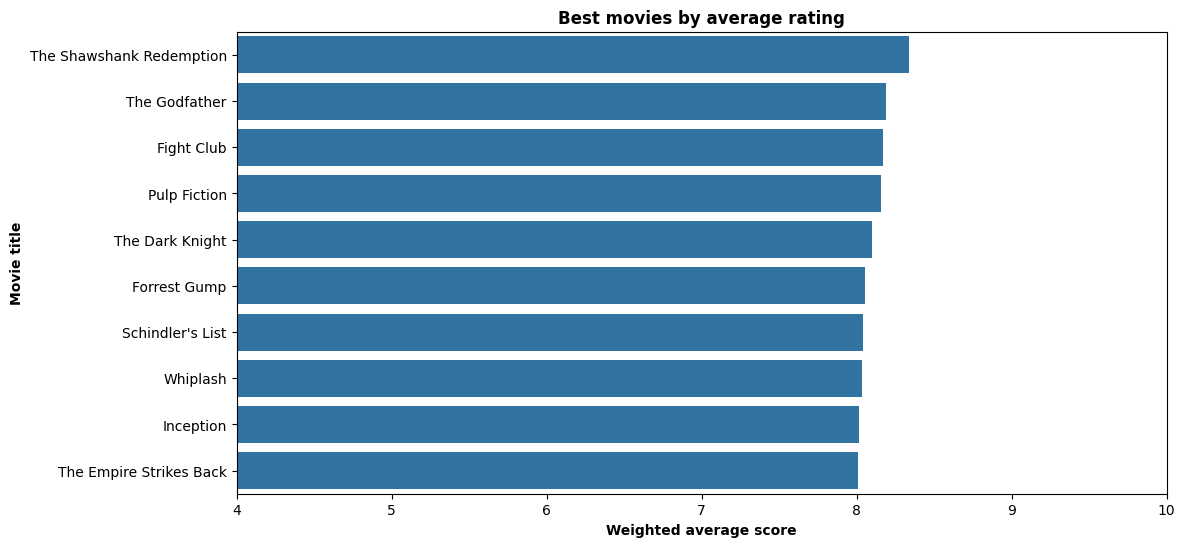

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
ax_1 = sns.barplot(x=movies_sorted_ranking['weighted_average'].head(10),y=movies_sorted_ranking['original_title'].head(10),data=movies_sorted_ranking)
plt.xlim(4,10)
plt.title('Best movies by average rating', weight='bold')
plt.xlabel('Weighted average score',weight='bold')
plt.ylabel('Movie title',weight='bold')
plt.savefig('best_movies.png')

Text(0, 0.5, 'Movie title')

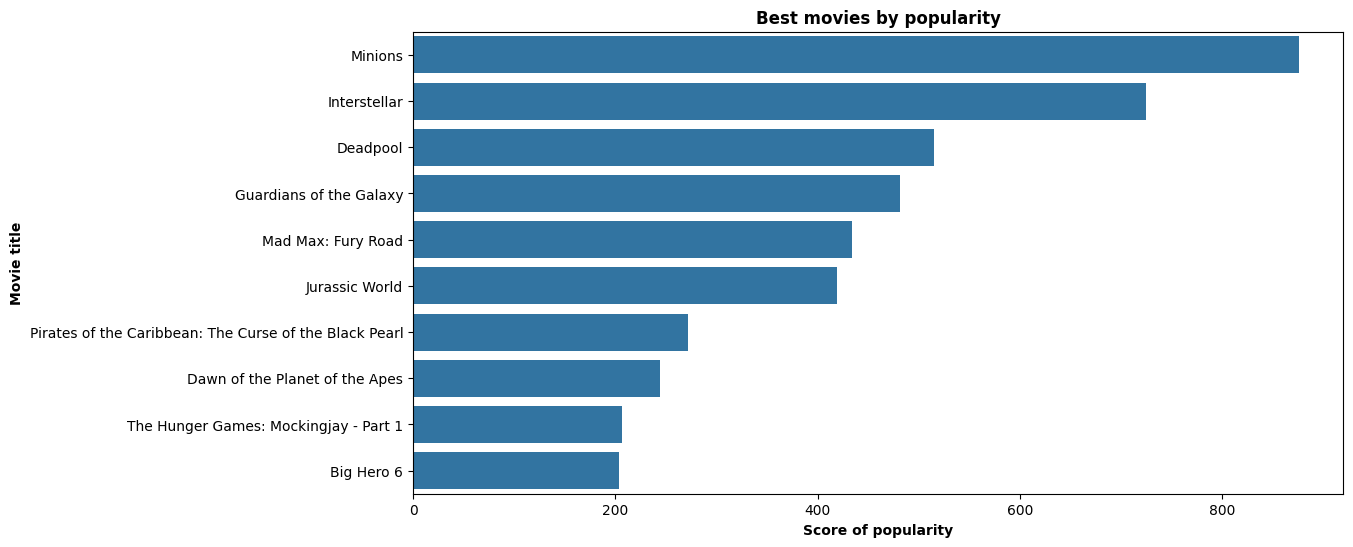

In [10]:
popularity = movies_sorted_ranking.sort_values('popularity',ascending=False)

plt.figure(figsize=(12,6))
ax_1 = sns.barplot(x=popularity['popularity'].head(10),y=popularity['original_title'].head(10),data=popularity)

plt.title('Best movies by popularity', weight='bold')
plt.xlabel('Score of popularity',weight='bold')
plt.ylabel('Movie title',weight='bold')

# **Recommendation based on both popularity and Weighted average(50% to both)**

In [11]:
from sklearn.preprocessing import MinMaxScaler

Scaling = MinMaxScaler()
movie_scale = Scaling.fit_transform(df_clean[['weighted_average','popularity']])
movie_scale_normalized = pd.DataFrame(movie_scale, columns=['norm_weighted_average','norm_popularity'])
movie_scale_normalized.head()

,norm_weighted_average,norm_popularity
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635
3,0.773054,0.128272
4,0.387739,0.050169


In [12]:
df_clean[['norm_weighted_average','norm_popularity']] = movie_scale_normalized
df_clean['score'] = df_clean['norm_weighted_average'] * 0.5 + df_clean['norm_popularity'] * 0.5
movie_final_sorted = df_clean.sort_values('score',ascending=False)
movie_final_sorted[['original_title','norm_weighted_average','norm_popularity','score']]

,original_title,norm_weighted_average,norm_popularity,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668
788,Deadpool,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,0.670973,0.495989,0.583481
...,...,...,...,...
2122,Epic Movie,0.102239,0.006926,0.054583
210,Batman & Robin,0.019593,0.057189,0.038391
3746,The Boy Next Door,0.039279,0.027595,0.033437
242,Fantastic Four,0.017935,0.043544,0.030740


<ipython-input-13-898f967d4fe1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=movie_final_sorted['score'].head(10), y=movie_final_sorted['original_title'].head(10), data=movie_final_sorted, palette='deep')


Text(0, 0.5, 'Movie Title')

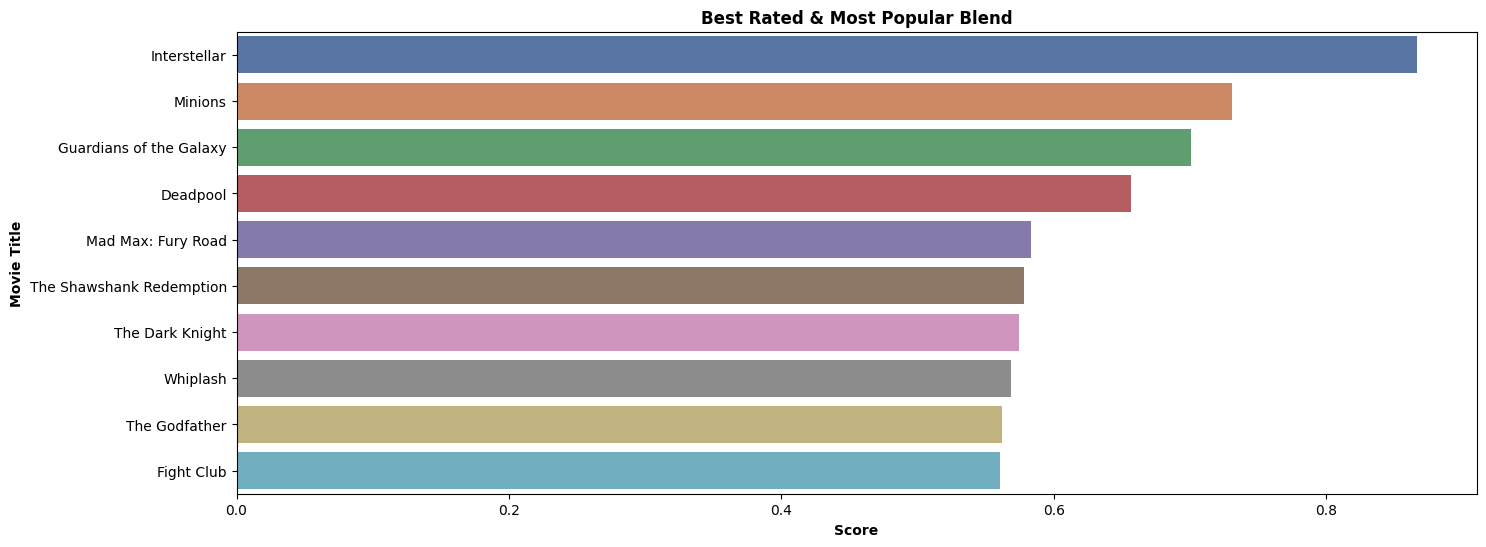

In [13]:
plt.figure(figsize=(16,6))

ax = sns.barplot(x=movie_final_sorted['score'].head(10), y=movie_final_sorted['original_title'].head(10), data=movie_final_sorted, palette='deep')

plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')